Packages to install
- plotly
- ta
- hvplot
- fredapi


In [ ]:
# !pip install plotly
# !pip install ta
# !pip install hvplot
# !pip install fredapi

In [8]:
import pandas as pd
import numpy as np
import yfinance as yahooFinance
import ta

In [10]:
# in order to specify start date and
# end date we need datetime package
import datetime

# startDate , as per our convenience we can modify
startDate = datetime.datetime(2010, 1, 1)

# endDate , as per our convenience we can modify
endDate = datetime.datetime(2023, 10, 18)
dfPrice = yahooFinance.Ticker("NVDA")

# pass the parameters as the taken dates for start and end
dfPrice = dfPrice.history(start=startDate,
                                     end=endDate)
dfPrice

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,4.245388,4.270617,4.153645,4.240800,80020400,0.0,0.0
2010-01-05 00:00:00-05:00,4.224747,4.348599,4.224747,4.302728,72864800,0.0,0.0
2010-01-06 00:00:00-05:00,4.300435,4.339425,4.259150,4.330251,64916800,0.0,0.0
2010-01-07 00:00:00-05:00,4.307314,4.325662,4.213278,4.245388,54779200,0.0,0.0
2010-01-08 00:00:00-05:00,4.210985,4.284379,4.185756,4.254562,47816800,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-11 00:00:00-04:00,461.959991,468.589996,460.500000,468.059998,37813700,0.0,0.0
2023-10-12 00:00:00-04:00,467.769989,476.089996,463.299988,469.450012,48132500,0.0,0.0
2023-10-13 00:00:00-04:00,469.600006,471.160004,452.799988,454.609985,47411500,0.0,0.0


In [11]:
dfPrice = dfPrice[['Open', 'High', 'Low', 'Close', 'Volume']]
dfPrice.sort_index(ascending=True, inplace=True)
dfPrice.rename(columns={'High': 'high', 'Low': 'low', 'Close': 'price', 'Volume': "cvol"}, inplace = True)
dfPrice

<ipython-input-11-6555e47db98f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrice.rename(columns={'High': 'high', 'Low': 'low', 'Close': 'price', 'Volume': "cvol"}, inplace = True)


,Open,high,low,price,cvol
Date,,,,,
2010-01-04 00:00:00-05:00,4.245388,4.270617,4.153645,4.240800,80020400
2010-01-05 00:00:00-05:00,4.224747,4.348599,4.224747,4.302728,72864800
2010-01-06 00:00:00-05:00,4.300435,4.339425,4.259150,4.330251,64916800
2010-01-07 00:00:00-05:00,4.307314,4.325662,4.213278,4.245388,54779200
2010-01-08 00:00:00-05:00,4.210985,4.284379,4.185756,4.254562,47816800
...,...,...,...,...,...
2023-10-11 00:00:00-04:00,461.959991,468.589996,460.500000,468.059998,37813700
2023-10-12 00:00:00-04:00,467.769989,476.089996,463.299988,469.450012,48132500
2023-10-13 00:00:00-04:00,469.600006,471.160004,452.799988,454.609985,47411500


Macro Data Extraction
- We will be extracting US macrodata that might be indicative of the stock price movement.
- Data includes inflation, GDP, unemployment, FOMC document.

In [13]:
def aggregate_period(df, period, resample='mean'):
    """
    Aggregating data based on required fields
    Period: D, W, M
    """
    if resample == 'mean':
        if period == 'D':
            df = df.resample('D').mean()

        elif period == 'W':
            df = df.resample('W-FRI').mean()

        elif period == 'M':
            df = df.resample('M').mean()

        else:
            raise Exception('Invalid timeframe from input')

    elif resample == 'last':
        if period == 'D':
            df = df.resample('D').last()

        elif period == 'W':
            df = df.resample('W-FRI').last()

        elif period == 'M':
            df = df.resample('M').last()

        else:
            raise Exception('Invalid timeframe from input')

    elif resample == 'sum':
        if period == 'D':
            df = df.resample('D').sum()

        elif period == 'W':
            df = df.resample('W-FRI').sum()

        elif period == 'M':
            df = df.resample('M').sum()

        else:
            raise Exception('Invalid timeframe from input')

    # ffill then bfill
    df = df.ffill(axis=0).bfill(axis=0)

    return df

In [18]:
from fredapi import Fred
import pandas as pd
import numpy as np
import hvplot.pandas

f = Fred(api_key = '13b56c7f5bbae11b853455e230c5f2d2')

# Retrieve the raw data from FRED
dfUn = f.get_series('UNRATE', observation_start='2010-1-1', frequency = 'm')

# Plot
dfUn.hvplot(title = "Unemployment Rate")

dfUn = pd.DataFrame(dfUn)
dfUn.index.name = 'Date'
dfUn.columns = ['US Unemployment']
dfUnWeek = aggregate_period(dfUn, 'W', resample='mean')
dfUnMonth = aggregate_period(dfUn, 'M', resample='mean')
dfUnWeek

,US Unemployment
Date,
2010-01-01,9.8
2010-01-08,9.8
2010-01-15,9.8
2010-01-22,9.8
2010-01-29,9.8
...,...
2023-08-04,3.8
2023-08-11,3.8
2023-08-18,3.8


In [19]:
from fredapi import Fred
import pandas as pd
import numpy as np
import hvplot.pandas

f = Fred(api_key = '13b56c7f5bbae11b853455e230c5f2d2')

# Retrieve the raw data from FRED
dfGdp = f.get_series('GDPC1', observation_start='2010-1-1')

# Plot
dfGdp.hvplot(title = "GDP")

dfGdp = pd.DataFrame(dfGdp)
dfGdp.index.name = 'Date'
dfGdp.columns = ['US GDP']
dfGdpWeek = aggregate_period(dfGdp, 'W', resample='mean')
dfGdpMonth = aggregate_period(dfGdp, 'M', resample='mean')
dfGdpMonth

,US GDP
Date,
2010-01-31,16582.710
2010-02-28,16582.710
2010-03-31,16582.710
2010-04-30,16743.162
2010-05-31,16743.162
...,...
2022-12-31,21989.981
2023-01-31,22112.329
2023-02-28,22112.329


In [20]:
from fredapi import Fred
import pandas as pd
import numpy as np
import hvplot.pandas

f = Fred(api_key = '13b56c7f5bbae11b853455e230c5f2d2')

# Retrieve the raw data from FRED
# Extract the 10Y Government Bond Yields for each country (make quarterly):
dfBond = f.get_series('IRLTLT01USM156N', observation_start='2010-1-1', frequency = 'm')

# Plot
dfBond = pd.DataFrame(dfBond)
dfBond.index.name = 'Date'
dfBond.columns = ['US 10Y Bond Yields']
dfBondWeek = aggregate_period(dfBond, 'W', resample='mean')
dfBondMonth = aggregate_period(dfBond, 'M', resample='mean')
dfBondWeek

,US 10Y Bond Yields
Date,
2010-01-01,3.73
2010-01-08,3.73
2010-01-15,3.73
2010-01-22,3.73
2010-01-29,3.73
...,...
2023-08-04,4.17
2023-08-11,4.17
2023-08-18,4.17


In [21]:
from fredapi import Fred
import pandas as pd
import numpy as np
import hvplot.pandas

f = Fred(api_key = '13b56c7f5bbae11b853455e230c5f2d2')

# Retrieve the raw data from FRED, SP500
dfSP500 = f.get_series('SP500', observation_start='2010-1-1', frequency = 'd')

# Plot
dfSP500.hvplot(title = "SP500")

dfSP500 = pd.DataFrame(dfSP500)
dfSP500.index.name = 'Date'
dfSP500.columns = ['SP500']
dfSP500Week = aggregate_period(dfSP500, 'W', resample='mean')
dfSP500Month = aggregate_period(dfSP500, 'M', resample='mean')
dfSP500Month

,SP500
Date,
2013-10-31,1756.828889
2013-11-30,1783.541000
2013-12-31,1807.775238
2014-01-31,1822.356667
2014-02-28,1817.034737
...,...
2023-06-30,4345.372857
2023-07-31,4508.075500
2023-08-31,4457.358696


In [22]:
from fredapi import Fred
import pandas as pd
import numpy as np
import hvplot.pandas

f = Fred(api_key = '13b56c7f5bbae11b853455e230c5f2d2')

# Retrieve the raw data from FRED, SP500
dfCpi = f.get_series('CPIAUCNS', observation_start='2010-1-1', frequency = 'm')

# Plot
dfCpi.hvplot(title = "CPI")
dfCpi = pd.DataFrame(dfCpi)
dfCpi.index.name = 'Date'
dfCpi.columns = ['US CPI']
dfCpiWeek = aggregate_period(dfCpi, 'W', resample='mean')
dfCpiMonth = aggregate_period(dfCpi, 'M', resample='mean')
dfCpiMonth

,US CPI
Date,
2010-01-31,216.687
2010-02-28,216.741
2010-03-31,217.631
2010-04-30,218.009
2010-05-31,218.178
...,...
2023-05-31,304.127
2023-06-30,305.109
2023-07-31,305.691


In [23]:
from fredapi import Fred
import pandas as pd
import numpy as np
import hvplot.pandas

f = Fred(api_key = '13b56c7f5bbae11b853455e230c5f2d2')

# Retrieve the raw data from FRED, SP500
dfPce = f.get_series('PCEPI', observation_start='2010-1-1', frequency = 'm')

# Plot
dfPce.hvplot(title = "PCE")
dfPce = pd.DataFrame(dfPce)
dfPce.index.name = 'Date'
dfPce.columns = ['US PCE']
dfPceWeek = aggregate_period(dfPce, 'W', resample='mean')
dfPceMonth = aggregate_period(dfPce, 'M', resample='mean')
dfPceMonth


,US PCE
Date,
2010-01-31,90.136
2010-02-28,90.134
2010-03-31,90.261
2010-04-30,90.310
2010-05-31,90.339
...,...
2023-04-30,119.893
2023-05-31,120.020
2023-06-30,120.221


In [24]:
from fredapi import Fred
import pandas as pd
import numpy as np
import hvplot.pandas

f = Fred(api_key = '13b56c7f5bbae11b853455e230c5f2d2')

# Retrieve the raw data from FRED, SP500
dfFed = f.get_series('DFEDTARU', observation_start='2010-1-1', frequency = 'm')

# Plot
dfFed.hvplot(title = "Fed Fund Rate")
dfFed = pd.DataFrame(dfFed)
dfFed.index.name = 'Date'
dfFed.columns = ['US Fed Fund Rate']
dfFedWeek = aggregate_period(dfFed, 'W', resample='mean')
dfFedMonth = aggregate_period(dfFed, 'M', resample='mean')
dfFedMonth

,US Fed Fund Rate
Date,
2010-01-31,0.25
2010-02-28,0.25
2010-03-31,0.25
2010-04-30,0.25
2010-05-31,0.25
...,...
2023-06-30,5.25
2023-07-31,5.29
2023-08-31,5.50


In [25]:
from fredapi import Fred
import pandas as pd
import numpy as np
import hvplot.pandas

f = Fred(api_key = '13b56c7f5bbae11b853455e230c5f2d2')

# Retrieve the raw data from FRED, SP500
dfPpi = f.get_series('PPIFID', observation_start='2010-1-1', frequency = 'm')

# Plot
dfPpi.hvplot(title = "US PPI")

dfPpi = pd.DataFrame(dfPpi)
dfPpi.index.name = 'Date'
dfPpi.columns = ['US PPI']
dfPpiWeek = aggregate_period(dfPpi, 'W', resample='mean')
dfPpiMonth = aggregate_period(dfPpi, 'M', resample='mean')
dfPpiMonth

,US PPI
Date,
2010-01-31,101.000
2010-02-28,100.900
2010-03-31,101.200
2010-04-30,101.600
2010-05-31,101.800
...,...
2023-05-31,140.912
2023-06-30,141.088
2023-07-31,141.891


In [26]:
# resample all the data and then concat it (can use the aggregate)


Week = [dfUnWeek, dfGdpWeek, dfBondWeek, dfSP500Week, dfCpiWeek, dfPceWeek, dfFedWeek, dfPpiWeek]
dfWeek = pd.concat(Week, axis=1)

In [27]:
Month = [dfUnMonth, dfGdpMonth, dfBondMonth, dfSP500Month, dfCpiMonth, dfPceMonth, dfFedMonth, dfPpiMonth]
dfMonth = pd.concat(Month, axis=1)

### Technical Analysis (Momentum Indicator)
Conducting potential technical analysis on pricing data.
1. Relative Strength Index (RSI)

### Relative Strength Index (RSI)
RSI is a technical indicator, and is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period. It compares the magnitude of recent gains and losses over a specified time period to measure speed and change of price movements of a security. In short, it generates overbought or oversold signals. Good for stable periods with minimal disruptions.

Values above 70 == overbought or overvalued (slide below 70 means bearish). Values below 30 == oversold or undervalued (bullish signals).

Feature Engineering: below 30 --> potential buy signal, above 70 --> potential sell signal


In [28]:
for i in [5, 14, 50]:

    dfPrice[f'rsi_{i}'] = ta.momentum.rsi(dfPrice['price'], i)
    dfPrice[f'rsi_{i}'] = dfPrice[f'rsi_{i}'].apply(lambda x: 1 if x < 30 else 0)

<ipython-input-28-05c706ed46bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrice[f'rsi_{i}'] = ta.momentum.rsi(dfPrice['price'], i)
<ipython-input-28-05c706ed46bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrice[f'rsi_{i}'] = dfPrice[f'rsi_{i}'].apply(lambda x: 1 if x < 30 else 0)


### Technical Analysis (Volume Indicator)
Conducting potential technical analysis on pricing data.
1. Ease of movement
2. Chaikin Money Flow (CMF)

### Ease of Movement
EVM is a volume based oscillator, indicating the ease with which the prices rise or fall taking into account the volume of the security. Example, price rise on low volume means prices advanced with relative ease, indicating little selling pressure. Positive EVM values imply that the market is moving higher with ease, while negative values indicate an easy decline. Purpose: used to confirm bullish or bearish trend. Increase in price with positive EVM confirms bullish trend, decrease in price with negative EVM confirms bearish trend.


In [29]:
for i in [5, 14, 50]:

    dfPrice[f'evm_{i}'] = ta.volume.ease_of_movement(dfPrice['high'], dfPrice['low'], dfPrice['cvol'], i)



### Technical Analysis (Volatility Indicator)
Conducting potential technical analysis on pricing data.
1. Bollinger Bands

### Bollinger Bands
Bollinger bands are often used to determine overbought and oversold conditions. Indicator focus on price and volatility (could be too biased). Rules: when the price breaks below the band, tend to bounce up, hence it is a buy strategy. when price breaks above the upper band, overbought and due for a pullback. Related to a mean reversion concept of price. FYI, the bands adapt to price expanding and contracting as volatility increases and decreases.



In [30]:
for i in [5, 14, 50]:

    # bollinger high band - indicator shows if the band has been surpassed
    dfPrice[f'bol_hband_{i}'] = ta.volatility.bollinger_hband_indicator(dfPrice['price'], i)

    # bollinger low band - indicator shows if the band has been surpassed
    dfPrice[f'bol_lband_{i}'] = ta.volatility.bollinger_lband_indicator(dfPrice['price'], i)

    # bollinger band width - indicates volatility (falling --> lower volatility, increasing --> higher volatility)
    dfPrice[f'bol_wband_{i}'] = ta.volatility.bollinger_wband(dfPrice['price'], i)

    # buy signals generated from bollinger bands rules, 1 mean buy, 0 means hold
    dfPrice[f'bol_buy_{i}'] = dfPrice[f'bol_lband_{i}'].apply(lambda x: 1 if x > 0 else 0)


### Technical Analysis (Trend Indicator)
Conducting potential technical analysis on pricing data.
1. Average Directional Movement Index
2. Moving Average Convergence Divergence (MACD)

### Average Directional Movement Index (Trend Indicator)
ADX measure the strength of a trend. The higher the magnitude of ADX, the stronger the trend.

Feature Engineering: ADX <= 25: No trend, 25 < ADX <=: Trending, ADX > 50: Strong Trending


In [31]:
for i in [5, 14, 50]:
    dfPrice[f'adx_{i}'] = ta.trend.adx(dfPrice['high'], dfPrice['low'], dfPrice['price'], window=i)

/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


### Moving Average Convergence Divergence (MACD)
MACD shows the relationship between two exponential moving averages of a stock price. Comparing MACD line against signal line (ie, 9-day EMA). MACD Diff indicates that if the value is positive, it signals a bullish outlook and positive momentum. Else, negative indicates bearish outlook and negative momentum.


In [32]:
dfPrice[f'macd_12_26'] = ta.trend.macd_diff(dfPrice['price'])

In [35]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=dfPrice["price"], x=dfPrice.index, name="NVDA"))
fig.update_layout(
    hovermode='x',
    title="Daily Time Series",
    xaxis_title="Time Period",
    yaxis_title="Price",
    autosize=True,
)
fig.update_xaxes(rangeslider_visible=True, showgrid=True, gridwidth=1, gridcolor='#ECECEC', zeroline=True, zerolinecolor='lightgrey')
fig.update_yaxes(automargin=True)

### Calculate Periodic Returns
- Do a preiodic pricing of the returns (use the last of the daily return for the month)
- Use mean of average trading volume

In [36]:
def aggregate_period(df, period, resample='mean'):
    """
    Aggregating data based on required fields
    Period: D, W, M
    """
    if resample == 'mean':
        if period == 'D':
            df = df.resample('D').mean()

        elif period == 'W':
            df = df.resample('W-FRI').mean()

        elif period == 'M':
            df = df.resample('M').mean()

        else:
            raise Exception('Invalid timeframe from input')

    elif resample == 'last':
        if period == 'D':
            df = df.resample('D').last()

        elif period == 'W':
            df = df.resample('W-FRI').last()

        elif period == 'M':
            df = df.resample('M').last()

        else:
            raise Exception('Invalid timeframe from input')

    elif resample == 'sum':
        if period == 'D':
            df = df.resample('D').sum()

        elif period == 'W':
            df = df.resample('W-FRI').sum()

        elif period == 'M':
            df = df.resample('M').sum()

        else:
            raise Exception('Invalid timeframe from input')

    # ffill then bfill
    df = df.ffill(axis=0).bfill(axis=0)

    return df

In [37]:
# Aggregate by Week, returns and volume

nvda_week_returns = aggregate_period(dfPrice[['price']], 'W', 'last')

nvda_week_returns['returns'] = nvda_week_returns['price']/nvda_week_returns['price'].shift(1) - 1

nvda_week_vol = aggregate_period(dfPrice[['cvol']], 'W', 'mean')

In [38]:
# Aggregate by Month, returns and volume

nvda_month_returns = aggregate_period(dfPrice[['price']], 'M', 'last')
nvda_month_returns['returns'] = nvda_month_returns['price']/nvda_month_returns['price'].shift(1) - 1
nvda_month_vol = aggregate_period(dfPrice[['cvol']], 'M', 'mean')

In [40]:
# Combine returns and cvol with the existing dataframe

df_nvda_week = nvda_week_returns.merge(nvda_week_vol, left_index=True, right_index=True, how='left')
df_nvda_month = nvda_month_returns.merge(nvda_month_vol, left_index=True, right_index=True, how='left')


In [41]:
### Join with technical indicators

# aggregate the technical indicators

df_dict = {
           'nvda_week': df_nvda_week,
           'nvda_month': df_nvda_month
}

for k, df in {'nvda': dfPrice}.items():

    for period, val in {'week': 'W', 'month': 'M'}.items():

        ldf = []

        for i in [5, 14, 50]:

            # sum for binary variables
            df_sum = aggregate_period(df[[f'rsi_{i}', f'evm_{i}', f'bol_buy_{i}']], val, 'sum')

            # mean for continuous variables
            df_mean = aggregate_period(df[[f'bol_wband_{i}', f'adx_{i}']], val, 'mean')

            ldf.append(df_sum)
            ldf.append(df_mean)

        # mean for macd variable
        df_macd_mean = aggregate_period(df[[f'macd_12_26']], val, 'mean')
        ldf.append(df_macd_mean)

        final_df = pd.concat(ldf, axis=1)
        df_dict[f'{k}_{period}'] = df_dict[f'{k}_{period}'].merge(final_df, left_index=True, right_index=True, how='left')

# Combine returns and cvol with the existing dataframe

df_nvda_week = df_dict['nvda_week']
df_nvda_month = df_dict['nvda_month']

# NVDA Week
df_nvda_week['returns_lead_1'] = df_nvda_week['returns'].shift(-1)

# NVDA Month
df_nvda_month['returns_lead_1'] = df_nvda_month['returns'].shift(-1)


In [46]:
df_nvda_week.index = pd.to_datetime(df_nvda_week.index )
df_nvda_week.index = df_nvda_week.index.tz_convert(None)
df_nvda_week.index = df_nvda_week.index.date
df_nvda_week

In [52]:
finalDf = df_nvda_week.merge(dfWeek, left_index=True, right_index=True)
# ffill then bfill
df = finalDf.ffill(axis=0).bfill(axis=0)
df

Machine Learning

In [54]:
import pandas as pd
import pickle
import numpy as np
import math
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm, tree
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from pandas.tseries.offsets import MonthEnd

In [55]:
# for feature selection for respective Ml models

feature_select_dict = {'xgb': [], 'svm_clf': [], 'sgd': [], 'bnb': [], 'rf': []} # dictionary of feature selection for different models

def returns_movement(s): # checked
    """
    Indicates the actual returns from historical data one period ahead
    """

    if (s['returns_lead_1'] > 0):
        return 1

    else:
        return 0

In [57]:
from sklearn.preprocessing import MinMaxScaler

df['returns_movement'] = df.apply(lambda x: returns_movement(x), axis=1) # y true for the next week data

X = df.drop(['returns_movement', 'returns_lead_1'], axis=1)
y = df['returns_movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.3)

# Scaling and Transformation
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)


### Stepwise Regression
# To eliminate multilcollinearity for certain models, we seek to drop highly correlated variables

import pandas as pd
import statsmodels.api as sm

# def forward_regression(X, y,
#                        threshold_in=0.01,
#                        verbose=False):
#     initial_list = []
#     included = list(initial_list)
#     while True:
#         changed=False
#         excluded = list(set(X.columns)-set(included))
#         new_pval = pd.Series(index=excluded)
#         for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.idxmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

#         if not changed:
#             break

#     return included

# def backward_regression(X, y,
#                            threshold_out=0.05,
#                            verbose=False):
#     included=list(X.columns)
#     while True:
#         changed=False
#         model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
#         # use all coefs except intercept
#         pvalues = model.pvalues.iloc[1:]
#         worst_pval = pvalues.max() # null if pvalues is empty
#         if worst_pval > threshold_out:
#             changed=True
#             worst_feature = pvalues.idxmax()
#             included.remove(worst_feature)
#             if verbose:
#                 print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
#         if not changed:
#             break
#     return included

# forward_regression(X_train, y_train)

# backward_regression(X_train, y_train)

## XGBoost Classifier

import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
from itertools import product
from sklearn.preprocessing import LabelEncoder

#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

def plot_features(booster, figsize):
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

xg = XGBClassifier()
xg.fit(X_train, y_train)

print(f"Accuracy Score: {metrics.accuracy_score(y_train, xg.predict(X_train))}")
print(f"Precision Score: {metrics.precision_score(y_train, xg.predict(X_train))}")

print(f"Accuracy Score: {metrics.accuracy_score(y_test, xg.predict(X_test))}")
print(f"Precision Score: {metrics.precision_score(y_test, xg.predict(X_test))}")


xg_params = {'max_depth': [3,6,9],
           'learning_rate': [0.001, 0.01, 0.05, 0.1],
           'n_estimators': [10, 50 ],
           'colsample_bytree': [0.3, 0.7],
            'min_child_weight': range(1,8,2),} #2,3 min

xg_clf = GridSearchCV(xg, xg_params, scoring='precision', verbose=2, n_jobs=-1, cv=2)
xg_clf.fit(X_test, y_test)

xg_clf.best_params_

Accuracy Score: 1.0
Precision Score: 1.0
Accuracy Score: 0.49074074074074076
Precision Score: 0.5289855072463768
Fitting 2 folds for each of 192 candidates, totalling 384 fits


{'colsample_bytree': 0.3,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 10}

In [58]:
xg = XGBClassifier(colsample_bytree= 0.3,
 learning_rate= 0.05,
 max_depth = 6,
 min_child_weight = 3,
 n_estimators = 10)

xg.fit(X_train, y_train)

print(f"Accuracy Score: {metrics.accuracy_score(y_train, xg.predict(X_train))}")
print(f"Precision Score: {metrics.precision_score(y_train, xg.predict(X_train))}")

print(f"Accuracy Score: {metrics.accuracy_score(y_test, xg.predict(X_test))}")
print(f"Precision Score: {metrics.precision_score(y_test, xg.predict(X_test))}")

Accuracy Score: 0.7420634920634921
Precision Score: 0.6858638743455497
Accuracy Score: 0.5555555555555556
Precision Score: 0.553921568627451


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

svm_params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

sv = svm.SVC()

svm_clf = GridSearchCV(sv, svm_params, scoring='precision', verbose=1, n_jobs=-1, cv=5)
svm_clf.fit(X_train, y_train)

svm_clf.best_params_

print(f"Accuracy Score: {metrics.accuracy_score(y_train, svm_clf.predict(X_train))}")
print(f"Precision Score: {metrics.precision_score(y_train, svm_clf.predict(X_train))}")

print(f"Accuracy Score: {metrics.accuracy_score(y_test, svm_clf.predict(X_test))}")
print(f"Precision Score: {metrics.precision_score(y_test, svm_clf.predict(X_test))}")

# from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# # Build step forward feature selection
# sfs1 = sfs(svm.SVC(**svm_clf.best_params_),
#            k_features=8,
#            forward=True,
#            floating=False,
#            verbose=2,
#            scoring='precision',
#            cv=5)

# # Perform SFFS
# sfs1 = sfs1.fit(X_train, y_train)

# # features
# feat_cols = list(sfs1.k_feature_idx_)
# print(feat_cols)
# svm_filtered_df = X_train.iloc[:,feat_cols]

# # The optimal feature selection is based on 8 features to reach the maximum precision score of 0.618

# feature_select_dict['svm'] = svm_filtered_df.columns.tolist()

# from sklearn.model_selection import GridSearchCV
# from sklearn import svm

# svm_clf_tuned = svm.SVC(**svm_clf.best_params_)
# X_train_svm = X_train[svm_filtered_df.columns.tolist()]
# X_test_svm = X_test[svm_filtered_df.columns.tolist()]
# svm_clf_tuned.fit(X_train_svm, y_train)

# print(f"Accuracy Score: {metrics.accuracy_score(y_test, svm_clf_tuned.predict(X_test_svm))}")
# print(f"Precision Score: {metrics.precision_score(y_test, svm_clf_tuned.predict(X_test_svm))}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Accuracy Score: 0.5634920634920635
Precision Score: 0.5580357142857143
Accuracy Score: 0.5648148148148148
Precision Score: 0.5612244897959183


In [60]:
from sklearn.model_selection import GridSearchCV
import tqdm
from tqdm import tqdm_notebook as tqdm

SGD = SGDClassifier(shuffle=False)
SGD.fit(X_train, y_train)

print(f"Accuracy Score: {metrics.accuracy_score(y_test, SGD.predict(X_test))}")
print(f"Precision Score: {metrics.precision_score(y_test, SGD.predict(X_test))}")


# sgd_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#                 "penalty": ["l1", "l2", "none"],}

# sgd_clf = GridSearchCV(SGD, sgd_params, scoring='precision', verbose=5, n_jobs=-1, cv=5)
# sgd_clf.fit(X_train, y_train)

# sgd_clf.best_params_

# print(f"Accuracy Score: {metrics.accuracy_score(y_train, sgd_clf.predict(X_train))}")
# print(f"Precision Score: {metrics.precision_score(y_train, sgd_clf.predict(X_train))}")

# print(f"Accuracy Score: {metrics.accuracy_score(y_test, sgd_clf.predict(X_test))}")
# print(f"Precision Score: {metrics.precision_score(y_test, sgd_clf.predict(X_test))}")

# from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# # Build step forward feature selection
# sfs1 = sfs(SGDClassifier(shuffle=False),
#            k_features=9,
#            forward=True,
#            floating=False,
#            verbose=2,
#            scoring='precision',
#            cv=5)

# # Perform SFFS
# sfs1 = sfs1.fit(X_train, y_train)

# # features
# feat_cols = list(sfs1.k_feature_idx_)
# print(feat_cols)
# X_train.iloc[:,feat_cols]

# # The optimal number of features is 9, with a precision score of 0.747 respectively. Columns are cpi_growth, event_sentiment_score, returns, bol_wband_14, gdp_growth.

# X_train_sgd = X_train.iloc[:,feat_cols]
# X_test_sgd = X_test.iloc[:,feat_cols]

# sgd_clf_tuned = SGDClassifier(**sgd_clf.best_params_, shuffle=False)
# sgd_clf_tuned.fit(X_train_sgd, y_train)

# print(f"Accuracy Score: {metrics.accuracy_score(y_test, sgd_clf_tuned.predict(X_test_sgd))}")
# print(f"Precision Score: {metrics.precision_score(y_test, sgd_clf_tuned.predict(X_test_sgd))}")

# feature_select_dict['sgd'] = X_train_sgd.columns.tolist()

Accuracy Score: 0.4675925925925926
Precision Score: 0.6363636363636364


In [61]:
from sklearn import metrics

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(f"Accuracy Score: {metrics.accuracy_score(y_test, rf.predict(X_test))}")
print(f"Precision Score: {metrics.precision_score(y_test, rf.predict(X_test))}")


Accuracy Score: 0.5231481481481481
Precision Score: 0.5539568345323741


In [62]:
def model_performance(models, model_names): # checked
    """
    Machine learning related performance metrics, specifically for classification models
    """
    df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC'])

    for n, model in enumerate(models):
        name = model_names[n]
        y_pred = model.predict(X_test)

        acc = metrics.accuracy_score(y_test, y_pred)
        prec = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        roc_auc = metrics.roc_auc_score(y_test, y_pred)

        #append row to df
        df = df.append(
            {
                'Model' : name,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': recall,
                'F1 score': f1,
                'ROC AUC': roc_auc
            }, ignore_index = True)

    return df.set_index('Model').transpose()

  feature_select_dict

{'xgb': [], 'svm_clf': [], 'sgd': [], 'bnb': [], 'rf': []}

Model performance with returns prediction


<ipython-input-62-114c873eada3>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-62-114c873eada3>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-62-114c873eada3>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-62-114c873eada3>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



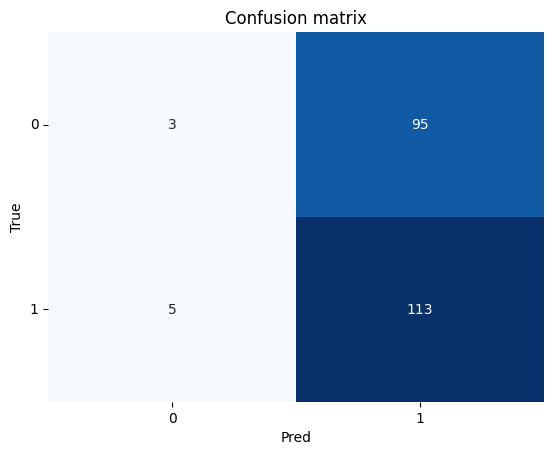

AUC: 0.47


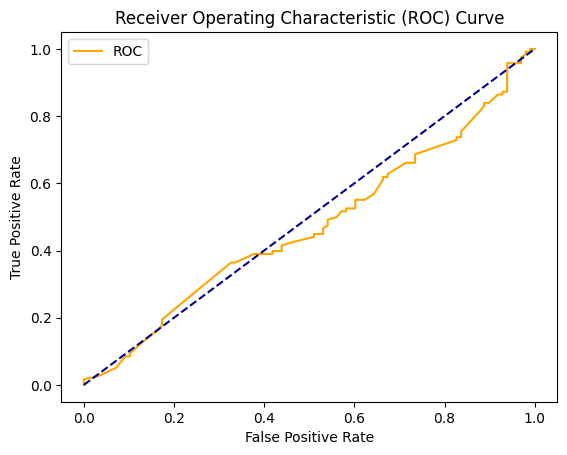

Model performance with returns prediction


<ipython-input-62-114c873eada3>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-62-114c873eada3>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-62-114c873eada3>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-62-114c873eada3>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-62-114c873eada3>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Model,xgb,svm,sgd,rf,stack
Accuracy,0.555556,0.564815,0.467593,0.523148,0.541667
Precision,0.553922,0.561224,0.636364,0.553957,0.546341
Recall,0.957627,0.932203,0.059322,0.652542,0.949153
F1 score,0.701863,0.700637,0.108527,0.599222,0.693498
ROC AUC,0.514528,0.527326,0.509253,0.509945,0.500086


In [64]:
## Model Performance

print("Model performance with returns prediction")
model_performance([xg, svm_clf, SGD, rf], ["xgb", 'svm', 'sgd', 'rf'])

# Ensemble Models

base_models = [
    ('xgb', xg),
    ('svm', svm_clf),
    ('sgd', SGD),
    ('rf', rf)
]

meta_model = svm.SVC(C=100, gamma=1, probability=True)

from sklearn.ensemble import StackingClassifier

stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1, verbose=5)
stacked_model.fit(X_train, y_train)
stacked_model.score(X_test, y_test)

stacked_model_svm = StackingClassifier(estimators=base_models, final_estimator=xg, n_jobs=-1, verbose=5)
stacked_model_svm.fit(X_train, y_train)
stacked_model_svm.score(X_test, y_test)

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, stacked_model_svm.predict(X_test), labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

# roc curve and auc
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs = stacked_model_svm.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

print("Model performance with returns prediction")
model_performance([xg, svm_clf, SGD, rf, stacked_model], ["xgb", 'svm', 'sgd', 'rf', 'stack'])


Returns variable

In [65]:
X = df.drop(['returns_movement', 'returns_lead_1'], axis=1)
y = df['returns_movement']

In [66]:
def returns_movement(s): # checked
    """
    Indicates the actual returns from historical data one period ahead
    """

    if (s['returns_lead_1'] > 0):
        return 1

    else:
        return 0

def model_positions(row, sentiment=False): # checked
    """
    Returns position as 1, 0 for Buy and Hold respectively
    based on the predicted price value and threshold
    FYI: predicting forward returns
    """

    if sentiment: # using current ess to make positioning for future returns outcome

        if row['event_sentiment_score'] > 0.2: # based on optimal threshold calculated based on 05D monthly datasets
            output = 1
        else:
            output = 0

    else: # following the score based on predicted returns

        if row['returns_predict_proba'] > 0.5: # same as using returns_predict > 0
            output = 1

        else:
            output = 0

    return output

def prediction_processing(df, model, freq, quantile=0.7): # checked
    """
    Data manipulation for model prediction, default process to run the model
    """

    # handling of frequency prediction (ie, weekly or monthly)
    min_max_scaler = MinMaxScaler()

    # scaling and transformation
    X = df.drop(['returns_movement', 'returns_lead_1'], axis=1)
    X = min_max_scaler.fit_transform(X)

    # Model Prediction
    result = model.predict(X)
    pred_result = model.predict_proba(X)
    df['returns_predict'] = result
    df['returns_predict_proba'] = pred_result[:,1] # get the prob of 1

    df['position'] = df.apply(lambda r: model_positions(r), axis=1)


    df['position_lag_1'] = df['position'].shift(1) # use previous months position to calculate performance metrics

    # Get the weekly log returns (assuming i make a decision on a daily basis)
    df['return_bm'] = df['returns']+1 # shift by 1 period (ie, curr - prev row)
    df['return_bm_cum'] = (df['return_bm']).cumprod()

    df['return_mp'] = df.apply(lambda x: x['return_bm'] if x['position_lag_1'] == 1 else 1.0, axis=1) # finding the previous position and multiply it by current month returns
    df['return_mp_cum'] = (df['return_mp']).cumprod()

    # creating strategy directions: both movement is for one period forward
    # df['sentiment_movement'] = df['event_sentiment_score'].apply(lambda x: 1 if x > 0 else 0)
    df['returns_movement'] = df.apply(lambda x: returns_movement(x), axis=1)

    return df

In [68]:
dfBackup = df.copy()

In [75]:
#Performance Metrics (Monthly)
#Using the classification method for the returns, with ESS features in AI/ML


import copy

train_df = df.copy()
train_df = train_df[(train_df.index < "2019-09-06")]

test_df = df.copy()
test_df = test_df[(test_df.index >= "2019-09-06")]

### Start from Test Dataset Dates (2015-04-30)

# testing rule-based optimisation - only on training data

df = df[(df.index < "2019-09-06")]
df

### Various Assumptions Involved:
# 1. At the end of the trading day, the team will make a decision for the next day given the collated datasets for the day
# 2. Predicting the next day's price, and comparing the result against the actual closing price.

# model parameters

finalised_model = xg
frequency = "W"

### For DBS

# TO Delete

df = train_df.copy()

# testing rule-based optimisation

df = test_df.copy()

df = prediction_processing(df, finalised_model, frequency) # sentiment strategy as True

### Personal analysis

# Output variables: (all these variables are predicting 1 period forward)
# 1. Sentiment Movement (based on current ESS, make prediction for next period)
# 2. Returns movement (actual returns_lead_1 from historical data, ie this shows the next period returns movement)
# 3. Position (based on returns classification model's position, make prediction for next period)

df[['returns_movement', 'position']].corr().style.background_gradient(cmap='Reds')

# Observation: very low correlation of all the variables with model and sentiment score.

df.columns

df.corr().style.background_gradient(cmap='Reds')

### end of personal analysis

import plotly.graph_objects as go
import numpy as np

fig_cum_returns = go.Figure()

# Add traces
fig_cum_returns.add_trace(go.Scatter(x=df.index, y=df['return_mp_cum'], name="Nvidia Buy Hold Strategy"))
fig_cum_returns.add_trace(go.Scatter(x=df.index, y=df['return_bm_cum'], name="Nvidia Sentiment Strategy"))
fig_cum_returns.update_layout(
    title="Nvidia Cumulative Returns",
    xaxis_title="Time Period",
    yaxis_title="Cumulative Returns (Arithmetic)"
)


In [84]:
### For NVDA

import plotly.graph_objects as go
import numpy as np

fig_abs_returns = go.Figure()

# Add traces
fig_abs_returns.add_trace(go.Scatter(x=df.index, y=df['return_mp'], name="NVDA Sentiment Strategy"))
fig_abs_returns.add_trace(go.Scatter(x=df.index, y=df['return_bm'], name="NVDA Buy Hold Strategy"))
fig_abs_returns.update_layout(
    title="NVDA Returns",
    xaxis_title="Time Period",
    yaxis_title="Returns (Arithmetic)"
)



In [81]:

def perf_format(performance_df, benchmark=False): # checked
    """
    Formatting the performance dataframe into desired precision and format
    """
    if benchmark==True:
        # converting certain rows into percentage
        performance.index_name = 'Metrics'
        performance_df = performance_df.round(decimals=5)
        performance_df.loc['Annualised Return (Benchmark)'] = ((performance_df.loc['Annualised Return (Benchmark)']-1).apply('{:.02%}'.format))
        performance_df.loc['Annualised Return (Sentiment)'] = ((performance_df.loc['Annualised Return (Sentiment)']-1).apply('{:.02%}'.format))
        performance_df.loc['Annualised Excess Return'] = ((performance_df.loc['Annualised Excess Return']).apply('{:.02%}'.format))
        performance_df.loc['Winrate'] = ((performance_df.loc['Winrate']).apply('{:.02%}'.format))
        performance_df.loc['Volatility (Benchmark)'] = ((performance_df.loc['Volatility (Benchmark)']).apply('{:.02%}'.format))
        performance_df.loc['Volatility (Sentiment)'] = ((performance_df.loc['Volatility (Sentiment)']).apply('{:.02%}'.format))
        performance_df.loc['Max Drawdown (Benchmark)'] = ((performance_df.loc['Max Drawdown (Benchmark)']).apply('{:.02%}'.format))
        performance_df.loc['Max Drawdown (Sentiment)'] = ((performance_df.loc['Max Drawdown (Sentiment)']).apply('{:.02%}'.format))


    else:
        # converting certain rows into percentage
        performance.index_name = 'Metrics'
        performance_df = performance_df.round(decimals=5)
        performance_df.loc['Annualised Return (Buy Hold)'] = ((performance_df.loc['Annualised Return (Buy Hold)']-1).apply('{:.02%}'.format))
        performance_df.loc['Annualised Return (Sentiment)'] = ((performance_df.loc['Annualised Return (Sentiment)']-1).apply('{:.02%}'.format))
        performance_df.loc['Annualised Excess Return'] = ((performance_df.loc['Annualised Excess Return']).apply('{:.02%}'.format))
        performance_df.loc['Winrate'] = ((performance_df.loc['Winrate']).apply('{:.02%}'.format))
        performance_df.loc['Volatility (Buy Hold)'] = ((performance_df.loc['Volatility (Buy Hold)']).apply('{:.02%}'.format))
        performance_df.loc['Volatility (Sentiment)'] = ((performance_df.loc['Volatility (Sentiment)']).apply('{:.02%}'.format))
        performance_df.loc['Max Drawdown (Buy Hold)'] = ((performance_df.loc['Max Drawdown (Buy Hold)']).apply('{:.02%}'.format))
        performance_df.loc['Max Drawdown (Sentiment)'] = ((performance_df.loc['Max Drawdown (Sentiment)']).apply('{:.02%}'.format))

    return performance_df

In [78]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score
from pandas.tseries.offsets import MonthEnd

def performance(result, period): # checked
    """
    Performance metrics based on the periodic time series
    """

    # filter the relevant banks first
    result.sort_index(inplace=True)

    # cumulative returns - for both bm and pm
    return_bm_cum = result.iloc[-1]['return_bm_cum']-1
    return_mp_cum = result.iloc[-1]['return_mp_cum']-1

    if period == "M":
        n_months= len(result.index)
        n_years=n_months/12

    elif period == "W":
        n_weeks= len(result.index)
        n_years=n_weeks/52

    else:
        raise Exception('Period window is not compatible. Please check if the time series is either weekly or monthly.')

    # auc=roc_auc_score(result['returns_movement'], result['position'])
    f1score=f1_score(result['returns_movement'], result['position'], average='weighted')
    precision=precision_score(result['returns_movement'], result['position'], average='weighted')

    ## trade lot and positive
    winrate=(np.array(result[(result['position_lag_1']!=0)]['return_mp'])>1).mean()

    anl_rtn_bm =(result[['return_bm','return_mp']].cumprod()**(1/n_years)).iloc[-1,0]
    anl_rtn_mp=(result[['return_bm','return_mp']].cumprod()**(1/n_years)).iloc[-1,1]
    anl_ex_rtn= anl_rtn_mp-anl_rtn_bm

    turnover=abs(result['position'].diff()).sum()/n_years/2

    ## sharpe ratio
    result['year']=pd.to_datetime(result.index).year
    result_year=result.groupby('year').agg('last')
    return_bm_y=(result_year['return_bm_cum']/result_year['return_bm_cum'].shift(1)-1).dropna() # series, not single value
    return_mp_y=(result_year['return_mp_cum']/result_year['return_mp_cum'].shift(1)-1).dropna()# series, not single value
    return_excess_y=return_mp_y-return_bm_y # portfolio - benchmark
    volatility_bm=return_bm_y.std() # to display as output performance
    volatility_mp=return_mp_y.std() # to display as output performance
    avg_ex_rtn=return_excess_y.mean()
    sharpe_ratio=avg_ex_rtn/return_excess_y.std()

    ## max_drawdown: buy and hold
    max_drawdown_bm=0
    for i in range(result.shape[0]):
        temp=result['return_bm_cum'][i:].min()/result['return_bm_cum'][i]-1

        if temp<max_drawdown_bm:
            max_drawdown_bm=temp

    ## max_drawdown: sentiment
    max_drawdown_mp=0
    for i in range(result.shape[0]):
        temp=result['return_mp_cum'][i:].min()/result['return_mp_cum'][i]-1

        if temp<max_drawdown_mp:
            max_drawdown_mp=temp

    return [anl_rtn_bm,anl_rtn_mp,anl_ex_rtn,winrate,turnover,volatility_bm,volatility_mp,max_drawdown_bm,max_drawdown_mp,return_bm_cum,return_mp_cum,sharpe_ratio,f1score,precision]


In [85]:
# Classification Performance Metrics
# We are interested to understand if the timing of the price movement is conclusive from the sentiment movements.

performance_nvda = performance(df, "W")
performance_df = pd.DataFrame(performance_nvda,index=['Annualised Return (Sentiment)','Annualised Return (Buy Hold)','Annualised Excess Return', 'Winrate', "Annualised Turnover", 'Volatility (Sentiment)', 'Volatility (Buy Hold)', 'Max Drawdown (Sentiment)', 'Max Drawdown (Buy Hold)',"Cumulative Return (Sentiment)", "Cumulative Return (Buy Hold)", 'Sharpe Ratio', 'F1 Score', "Precision"], columns=['NVDA'])

# formatting
performance_df = perf_format(performance_df)
performance_df

,NVDA
Annualised Return (Sentiment),76.29%
Annualised Return (Buy Hold),71.99%
Annualised Excess Return,-4.30%
Winrate,54.72%
Annualised Turnover,0.96296
Volatility (Sentiment),106.19%
Volatility (Buy Hold),105.57%
Max Drawdown (Sentiment),-65.94%
Max Drawdown (Buy Hold),-65.94%
Cumulative Return (Sentiment),9.53988


In [87]:
# dfFinalised = pd.read_csv('sentiscore.csv')
# dfFinalised = dfFinalised.ffill(axis=0).bfill(axis=0)
# dfFinalised.to_csv('dfFinalised.csv')

In [92]:
dfFinalised[['date', 'price', 'returns', 'cvol', 'rsi_5', 'rsi_50', 'evm_50', 'bol_buy_50',
       'bol_wband_50', 'adx_50', 'macd_12_26', 'returns_lead_1',
       'US Unemployment', 'US GDP', 'US 10Y Bond Yields', 'SP500', 'US CPI',
       'US PCE', 'US Fed Fund Rate', 'US PPI', 'returns_movement',
       'returns_predict', 'returns_predict_proba', 'position',
       'return_bm', 'return_bm_cum', 'return_mp',
       'return_mp_cum', 'sentiment']].to_csv('dfFinalised.csv', index=False)